In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
cluster_num = 2
sorted_clusters_path = "./clusters/sorted_clusters"

In [25]:
# Load paths
image_paths = np.load("./person_vehicle_img_paths.npy")

In [26]:
from PIL import Image

def load_cluster_data(cluster_id, sorted_clusters_path, paths_memory):
    """ Load file paths for a specific cluster. """
    cluster_data = np.load(f"{sorted_clusters_path}/sorted_cluster_{cluster_id}.npy")
    cluster_indices = [int(entry[0]) for entry in cluster_data]
    return [[index, paths_memory[index]] for index in cluster_indices]

def filter_dedup_data(deduped_paths, original_data):
    """ Filter deduplicated paths for a specific cluster. """
    # Assuming deduped_paths contains indices, map them to file paths
    non_deduped_data = []
    
    for path in original_data:
        if path[0] in deduped_paths:
            non_deduped_data.append(path)
    
    return non_deduped_data
    
def plot_images(image_paths, title):
    """ Plot a set of images. """
    images_per_row = 5
    
    num_images = len(image_paths)
    if num_images == 0:
        print("No images to show.")
        return
    elif num_images > 20:
        image_paths = image_paths[:20]
        num_images = 20

    # Calculate the number of rows and columns
    num_rows = np.ceil(num_images / images_per_row).astype(int)
    num_cols = min(num_images, images_per_row)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
    if num_rows == 1:  # If only one row, axes is a 1D array
        axes = [axes]

    for i, ax in enumerate(np.ravel(axes)):
        if i < num_images:
            # Specify the image path
            image_path = image_paths[i]  # replace 0 with the index of the image you want to plot

            # Open the image file
            img = Image.open(image_path[1])

            # Plot the image
            ax.imshow(img)
            ax.axis('off')  # to hide the axis
        else:
            ax.axis('off')  # Turn off axes for empty plots

    plt.suptitle(title)
    plt.show()

In [27]:
deduped_paths

[111, 174]

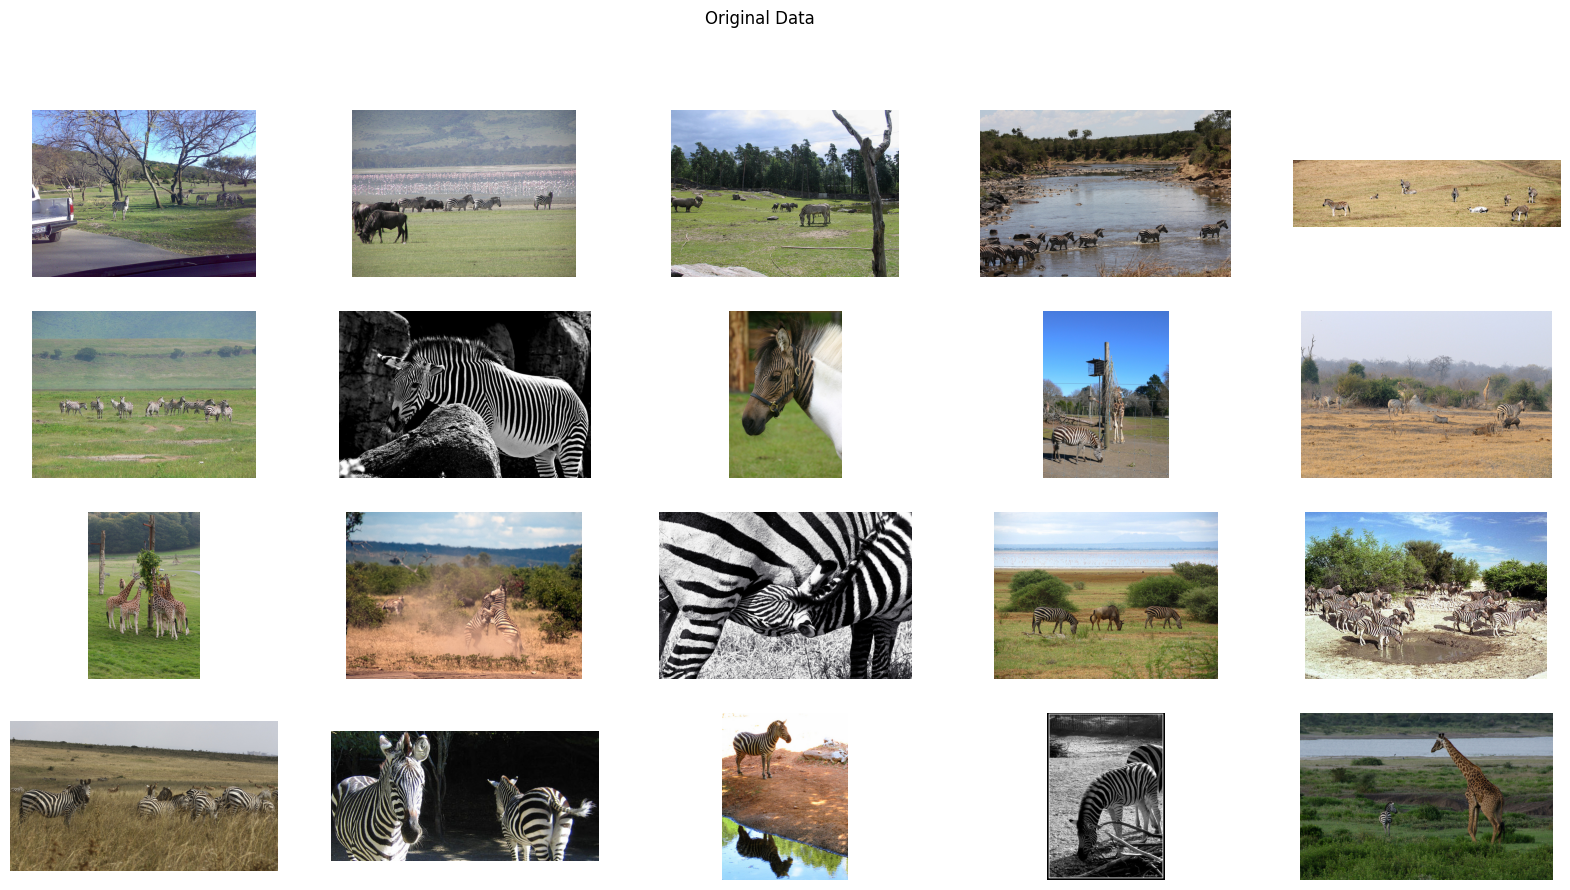

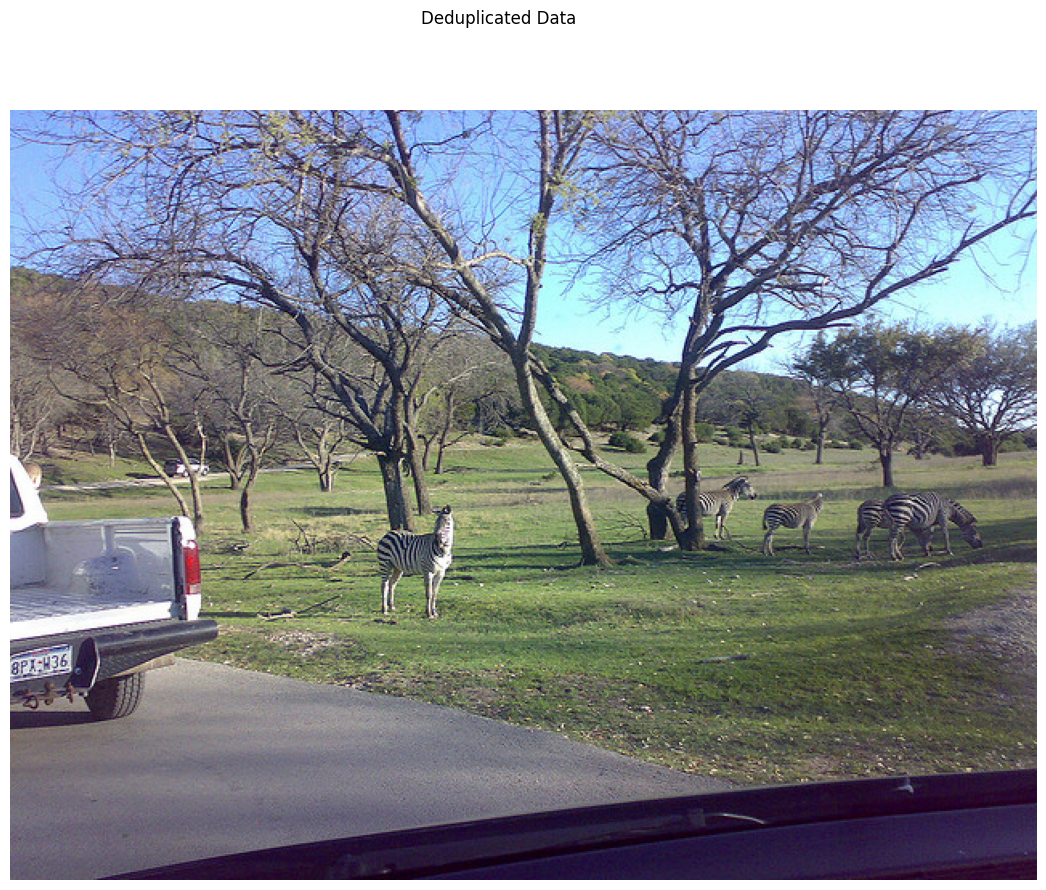

In [29]:
# Assuming deduplicated paths are in output_txt_path
output_txt_path = "./pleasework.txt"

with open(output_txt_path, "r") as file:
    removed_data = file.readlines()
    removed_data = [line.rstrip('\n') for line in removed_data]
    # Assuming you have a variable `double_var` which is of type double
    deduped_paths = [int(float(i)) for i in removed_data]

total = 0
relevant_clusters = []
for cluster_num in range(cluster_num):
    original_data = load_cluster_data(cluster_num, sorted_clusters_path, image_paths)
    deduped_data = filter_dedup_data(deduped_paths, original_data)
    total += len(deduped_data)
    if len(original_data) > len(deduped_data) and len(deduped_data) > 2:
        relevant_clusters.append([cluster_num, len(original_data), len(deduped_data)])
        # print(f"ori {len(original_data) - len(deduped_data)}")
    
# Load original and deduplicated data
cluster_id = 0 # replace x with your cluster number
original_data = load_cluster_data(cluster_id, sorted_clusters_path, image_paths)

deduped_data = filter_dedup_data(deduped_paths, original_data)
# Plotting
plot_images(original_data, 'Original Data')
plot_images(deduped_data, 'Deduplicated Data')